In [1]:
import pandas as pd
import numpy as np
import fasttext
import operator
import fasttext.util
from collections import defaultdict

In [68]:
sample = pd.read_csv('amostra.csv')

In [5]:
# load fasttext word embedding 
ft = fasttext.load_model('cc.pt.300.bin')

In [57]:
# create a dictionary of units and normalize units
std_units = list(set(sample['nm_un_fornec']))
com_units = list(set(sample['unid_comercial']))
unit_dict = {
 'UND':'UNIDADE',
 'pct':'PACOTE',
 'PC':'PACOTE',
 'un':'UNIDADE', 
 'UNID.':'UNIDADE',
 'PT':'UNIDADE',
 'kg':'QUILOGRAMA',
 'KG':'QUILOGRAMA',
 'PCT':'PACOTE',
 'DZ':'DUZIA',
 'FD':'FARDO',
 'GL':'GALAO',
 'FR':'FRASCO',
 'PCTE':'PACOTE',
 'pc':'PACOTE',
 'PÇ':'PACOTE',
 'DP':'DP',
 'dz':'DUZIA',
 'CX':'CAIXA',
 'PÇA':'PCA',
 'UN':'UNIDADE',
 'CAIXA':'CAIXA',
 'LT':'LITRO',
 '-':'-',
 'PCS':'PCS'
}
sample['unid_comercial'] =sample['unid_comercial'].apply(lambda x: unit_dict[x])

In [69]:
# normalize text and replace special characters
text_normal = {
    "Á":"A",
    "À":"A",
    "Ã":"A",
    "Â":"A",
    "É":"E",
    "È":"E",
    "Ê":"E",
    "Í":"I",
    "Ì":"I",
    "Î":"I",
    "Ó":"O",
    "Ò":"O",
    "Õ":"O",
    "Ô":"O",
    "Ú":"U",
    "Ù":"U",
    "Û":"U",
    "Ç":"C"
}

def normalize(string):
    s = ''
    alpha_num = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    for i in string:
        if i in text_normal.keys():
            s+=text_normal[i]
        elif i not in alpha_num:
            s+= ' '
        else:
            s+=i
    return s

sample['descr_prod'] =sample['descr_prod'].apply(lambda x: normalize(x))
sample['descr_item'] =sample['descr_item'].apply(lambda x: normalize(x))

In [141]:
# compile a list of candidate BEC codes
cod_dict = defaultdict(list)
cod_item = defaultdict(list)
for index,row in sample.iterrows():
    descr = row['descr_item'].split()
    unit = row['nm_un_fornec'].split()
    if row['cod_item'] not in cod_item[row['CODIGOLICITACAO']]:
        cod_dict[row['CODIGOLICITACAO']].append((row['cod_item'], descr+unit))
    cod_item[row['CODIGOLICITACAO']].append(row['cod_item'])
    
# compile a list of stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')
for i in range(len(stopwords)):
    stopwords[i] = normalize(stopwords[i].upper())
    
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

def match_BEC(s,l):
    s = [i for i in s if i not in stopwords]
    scores = {}
    for bec in l:
        temp = [i for i in bec[1] if i not in stopwords]
        scores[bec[0]] = jaccard(s,temp)
    return max(scores.items(), key=operator.itemgetter(1))[0]

match_dict = defaultdict(int)
for index,row in sample.iterrows():
    descr = row['descr_prod'].split()
    unit = row['unid_comercial'].split()
    s = descr+unit
    match_dict[index] = match_BEC(s,cod_dict[row['CODIGOLICITACAO']])

In [142]:
match_dict

defaultdict(int,
            {0: 1900072,
             1: 1639170,
             2: 1639170,
             3: 4701984,
             4: 2327058,
             5: 2797445,
             6: 1900072,
             7: 1639170,
             8: 1639170,
             9: 4701984,
             10: 2327058,
             11: 2797445,
             12: 1900072,
             13: 1639170,
             14: 1639170,
             15: 4701984,
             16: 2327058,
             17: 2797445,
             18: 1900072,
             19: 1639170,
             20: 1639170,
             21: 4701984,
             22: 2327058,
             23: 2797445,
             24: 1900072,
             25: 1639170,
             26: 1639170,
             27: 4701984,
             28: 2327058,
             29: 2797445,
             30: 1900072,
             31: 1639170,
             32: 1639170,
             33: 4701984,
             34: 2327058,
             35: 2797445,
             36: 4544080,
             37: 4544080,
     

# Calculate distinct BEC codes

In [2]:
sample = pd.read_csv('descriptions_1920.csv')

In [11]:
BEC_count = defaultdict(list)
item_count = defaultdict(int)
for index,row in sample.iterrows():
    if row['descr_item'] not in BEC_count[row['codigo']]:
        BEC_count[row['codigo']].append(row['descr_item'])
    item_count[row['codigo']] += 1
    if index % 100000 == 0:
        print(index)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000


In [15]:
for i in BEC_count:
    BEC_count[i] = len(BEC_count[i])

/Users/xichen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Density'), Text(0.5, 0, '#distinct BEC codes')]

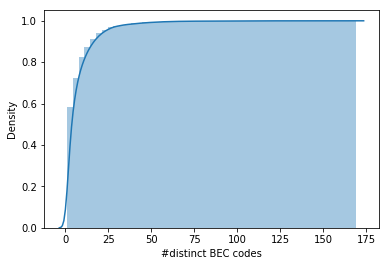

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

kwargs = {'cumulative': True}
ax = sns.distplot(list(BEC_count.values()), hist_kws=kwargs, kde_kws=kwargs)
ax.set(xlabel='#distinct BEC codes', ylabel='Density')


In [29]:
item_bec = defaultdict(list)
for i in item_count:
    item_bec[item_count[i]].append(BEC_count[i])